In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("F:\ML\Machine Learning\CSV file\homeprices_banglore.csv")
X = df[['area','bedrooms']].values
y = df[['price']].values

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\HP\AppData\Local\Temp\ipykernel_3260\2296004170.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("F:\ML\Machine Learning\CSV file\homeprices_banglore.csv")


In [4]:
X

array([[1056,    2],
       [2600,    4],
       [1440,    3],
       [1521,    3],
       [1200,    2],
       [1170,    2],
       [2732,    4],
       [3300,    4],
       [1310,    3],
       [3700,    5],
       [1800,    3],
       [2785,    4],
       [1000,    2],
       [1100,    2],
       [2250,    3],
       [1175,    2],
       [1180,    3],
       [1540,    3],
       [2770,    3],
       [ 800,    1]])

In [5]:
y

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [6]:
sx = MinMaxScaler()
sy = MinMaxScaler()

In [7]:
X_scaled = sx.fit_transform(X)
y_scaled = sy.fit_transform(y)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(2,),activation='linear')
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
optimizer_batch = tf.keras.optimizers.SGD(learning_rate=0.01)

In [24]:
model.compile(optimizer=optimizer_batch, loss='mse')

In [25]:
history_batch = model.fit(X_scaled, y_scaled, epochs=1000, verbose=0)

In [26]:
w_batch, b_batch = model.layers[0].get_weights()
print("Batch Gradient Descent:")
print("Weights:", w_batch.flatten())
print("Bias:", b_batch)

Batch Gradient Descent:
Weights: [0.4333759  0.82707655]
Bias: [-0.19934042]


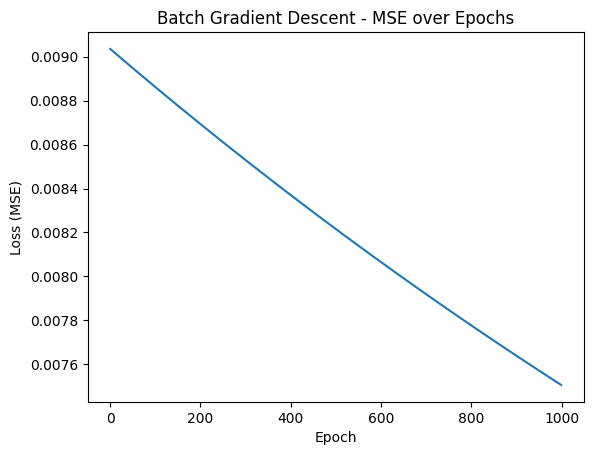

In [27]:
plt.plot(history_batch.history['loss'])
plt.title("Batch Gradient Descent - MSE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()

In [28]:
# Rebuild the same model structure
model_sgd = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation='linear')
])

optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.1)

model_sgd.compile(optimizer=optimizer_sgd, loss='mse')

# Training with batch_size = 1 → stochastic updates
history_sgd = model_sgd.fit(X_scaled, y_scaled, epochs=200, batch_size=1, verbose=0)

# Extract weights and bias
w_sgd, b_sgd = model_sgd.layers[0].get_weights()
print("Stochastic Gradient Descent:")
print("Weights:", w_sgd.flatten())
print("Bias:", b_sgd)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Stochastic Gradient Descent:
Weights: [0.9181638  0.20639218]
Bias: [-0.05688994]


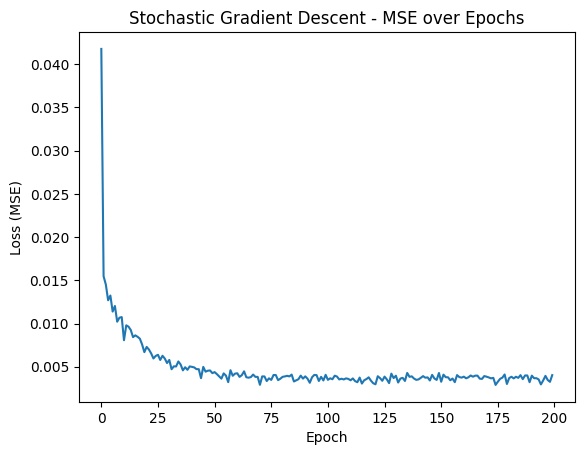

In [29]:
plt.plot(history_sgd.history['loss'])
plt.title("Stochastic Gradient Descent - MSE over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.show()


In [30]:
def predict_price(area, bedrooms, model):
    scaled_X = sx.transform([[area, bedrooms]])
    scaled_price = model.predict(scaled_X)
    return sy.inverse_transform(scaled_price)[0][0]

print("\n--- Price Predictions ---")
print("Batch GD prediction for 2600 sqft, 4 bedrooms:", predict_price(2600, 4, model))
print("SGD prediction for 2600 sqft, 4 bedrooms:", predict_price(2600, 4, model_sgd))


--- Price Predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Batch GD prediction for 2600 sqft, 4 bedrooms: 125.14446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
SGD prediction for 2600 sqft, 4 bedrooms: 122.15286
